# Predicting Employee Attrition: A Human Resources Solution
### Leonid Shpaner, Payal Bhavesh Muni, and Sean Torres

&nbsp;
&nbsp;
&nbsp;
&nbsp;

### Github  Repository:
[https://github.com/MSADS-505-Data-Science-for-Business/predicting_employee_attrition](https://github.com/MSADS-505-Data-Science-for-Business/predicting_employee_attrition)

### Loading the necessary packages/libraries

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.legend_handler import HandlerLine2D
%matplotlib inline

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn import metrics, preprocessing
from sklearn.metrics import roc_curve, auc, mean_squared_error,\
precision_score, recall_score, f1_score, accuracy_score,\
confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from dmba import gainsChart

import pydotplus
from IPython.display import Image
from prettytable import PrettyTable

import warnings
warnings.filterwarnings("ignore")

## Problem Statement

* **The Multinational Corporation wants to examine their employee attrition rate**
* **There has been a growing concern about the impact attrition might have on our organization, so the MNC wants to predict this rate going forward.**

**Goal: To predict the likelihood of an employee leaving the organization**

### Reading in and inspecting the dataframe

In [2]:
# read in the dataset from excel
url = 'https://raw.githubusercontent.com/munipayal1/\
MADS-505-Final-Project/main/HR_Employee_Data.csv'

hr = pd.read_csv(url)

In [3]:
# inspect the first 5 rows of the dataset
hr.head()

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,38%,53%,2,157,3,0,1,0,sales,low
1,IND28133,80%,86%,5,262,6,0,1,0,sales,medium
2,IND07164,11%,88%,7,272,4,0,1,0,sales,medium
3,IND30478,72%,87%,5,223,5,0,1,0,sales,low
4,IND24003,37%,52%,2,159,3,0,1,0,sales,low


In [4]:
# removing percentage signs
hr['satisfaction_level'] = list(map(lambda x: x[:-1], 
                           hr['satisfaction_level'].\
                           values))
#change satisfaction_level and last_evaluation to float
hr['satisfaction_level'] = (hr['satisfaction_level']).\
                            astype('float64')
hr['last_evaluation'] = list(map(lambda x: x[:-1], 
                                 hr['last_evaluation'].\
                                 values))
# used .astype instead of numeric to alter df than series 
hr['last_evaluation'] = (hr['last_evaluation']).\
                         astype('float64')
hr.head()

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,38.0,53.0,2,157,3,0,1,0,sales,low
1,IND28133,80.0,86.0,5,262,6,0,1,0,sales,medium
2,IND07164,11.0,88.0,7,272,4,0,1,0,sales,medium
3,IND30478,72.0,87.0,5,223,5,0,1,0,sales,low
4,IND24003,37.0,52.0,2,159,3,0,1,0,sales,low


In [5]:
# inspect # of rows and columns, unique values
numb_rows = hr.shape[0]
numb_col = hr.shape[1]
# check for unique employee ID number

print('Number of Rows:', numb_rows)
print('Number of Cols:', numb_col)
print('Numbver of unique rows:',hr['Emp_Id'].nunique())

Number of Rows: 14999
Number of Cols: 11
Numbver of unique rows: 14999


&nbsp;
&nbsp;
&nbsp;
&nbsp;

## Exploratory Data Analysis (EDA)

&nbsp;
&nbsp;
&nbsp;
&nbsp;

**Renaming Columns for clarity**

In [6]:
# Renaming some columns
hr = hr.rename(columns={'Emp_Id':'Employee_ID',
                        'average_montly_hours':
                        'average_monthly_hours',
                        'left':'Attrition'})
# Dummy Target Variable in a new column
hr['Status'] = hr['Attrition'].map({1:'left', 0:'stayed'})

&nbsp;
&nbsp;
&nbsp;
&nbsp;

**Inspecting the data types**

In [7]:
print("\033[1m"+'Data Types'+"\033[1m")
hr.dtypes

Data Types


Employee_ID               object
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
time_spend_company         int64
Work_accident              int64
Attrition                  int64
promotion_last_5years      int64
Department                object
salary                    object
Status                    object
dtype: object

&nbsp;
&nbsp;
&nbsp;
&nbsp;

In [8]:
# inspect dataset for missing values
print("\033[1m"+'Null Value Counts'+"\033[1m")
hr.isnull().sum()

Null Value Counts


Employee_ID              0
satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
Attrition                0
promotion_last_5years    0
Department               0
salary                   0
Status                   0
dtype: int64

**Examining Correlation for Multicollinearity**

Employee Data: Correlation Matrix


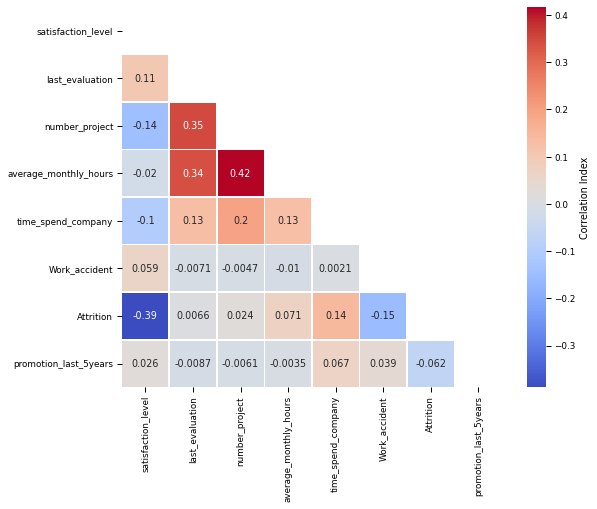

In [9]:
# correlation matrix 
print("\033[1m"+'Employee Data: \
Correlation Matrix'+"\033[1m")

corr = hr.corr()
# sns.heatmap(corr, annot=True, mask=matrix)
sns.set_context('paper', font_scale=1)
plt.figure(figsize=(9,7))
plt.tight_layout(pad = 10, w_pad=10, h_pad=10)
matrix = np.triu(corr)
sns.heatmap(hr.corr(method='pearson'), annot=True, 
            linewidths=.5, cmap="coolwarm", mask=matrix,
            square = True, cbar_kws={'label': 
                                     'Correlation Index'})
plt.show()

**Average_monthly_hours and number_projects are moderately correlated (*r* = 0.42). Additionally, 'number_project' and 'last_evaluation' are less moderately correlated (*r* = 0.35). 'Average_monthly_hours' is slightly less moderately correlated to 'last_evaluation' (*r* = 0.34). Lastly, 'satisfaction_level' is moderately and negatively correlated with the target 'Attrition' (*r* = -0.39).**
    
**From this analysis and the ensuing scatter plots, there exists almost no relationships between attrition and other predictors, except 'time_spend_company' (*r* = 0.14), and 'work_accident' (*r* = -0.15).**

Selected Scatter Plots from Four Highest Correlated Predictors


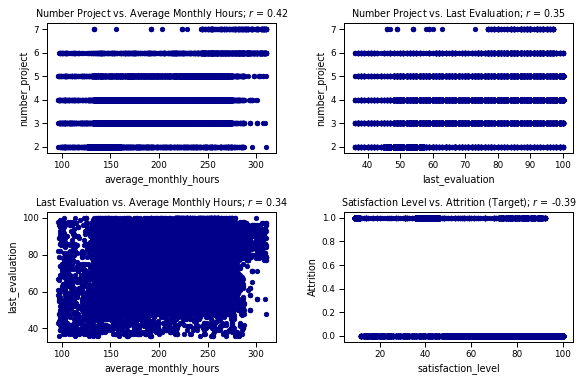

In [10]:
# Selected Scatter Plots
print("\033[1m"+'Selected Scatter Plots from \
Four Highest Correlated Predictors'+"\033[1m")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,5))
flat = axes.flatten()
fig.tight_layout(w_pad=4, h_pad=4)
hr.plot.scatter(x='average_monthly_hours',
                y='number_project',
                c='DarkBlue', ax=flat[0])
corr1 = round(np.corrcoef(hr.average_monthly_hours,
                          hr.number_project)[0,1],2)
flat[0].set_title('Number Project vs. Average Monthly Hours;'
                  ' $\mathit{r}$ = ' + "{:.2f}".format(corr1))
hr.plot.scatter(x='last_evaluation',
                y='number_project',
                c='DarkBlue', ax=flat[1])
corr2 = round(np.corrcoef(hr.last_evaluation,
                          hr.number_project)[0,1],2)
flat[1].set_title('Number Project vs. Last Evaluation;'
                  ' $\mathit{r}$ = ' + "{:.2f}".format(corr2))
hr.plot.scatter(x='average_monthly_hours',
                y='last_evaluation',
                c='DarkBlue', ax=flat[2])
corr3 = round(np.corrcoef(hr.average_monthly_hours,
                          hr.last_evaluation)[0,1],2)
flat[2].set_title('Last Evaluation vs. Average Monthly Hours;'
                  ' $\mathit{r}$ = ' + "{:.2f}".format(corr3))
hr.plot.scatter(x='satisfaction_level', 
                y='Attrition',
                c='DarkBlue', ax=flat[3])
corr4 = round(np.corrcoef(hr.satisfaction_level,
                          hr.Attrition)[0,1],2)
flat[3].set_title('Satisfaction Level vs. Attrition (Target);'
                  ' $\mathit{r}$ = ' + "{:.2f}".format(corr4))
plt.show()

### Summary Statistics Tables

In [11]:
# employee summary statistics
print("\033[1m"+'Employee Summary Statistics'+"\033[1m")

def summary_by_var():
    pd.options.display.float_format = '{:,.2f}'.format
    summary = hr.describe().loc[['mean', 'std', 'min', 
                                      '25%', '50%', '75%', 'max']].T
    column_rename = {'mean': 'Mean', 'median': 'Median',
                     'std': 'Standard Deviation',\
                     'min':'Minimum','max': 'Maximum'}
    dfsummary = summary.rename(columns = column_rename)
    return dfsummary

summary_by_var()

Employee Summary Statistics


,Mean,Standard Deviation,Minimum,25%,50%,75%,Maximum
satisfaction_level,61.28,24.86,9.00,44.00,64.00,82.00,100.00
last_evaluation,71.61,17.12,36.00,56.00,72.00,87.00,100.00
number_project,3.80,1.23,2.00,3.00,4.00,5.00,7.00
average_monthly_hours,201.05,49.94,96.00,156.00,200.00,245.00,310.00
time_spend_company,3.50,1.46,2.00,3.00,3.00,4.00,10.00
Work_accident,0.14,0.35,0.00,0.00,0.00,0.00,1.00
Attrition,0.24,0.43,0.00,0.00,0.00,0.00,1.00
promotion_last_5years,0.02,0.14,0.00,0.00,0.00,0.00,1.00


***Note.*** **Employees report a mean satisfaction level of approximately 61%. Over the last five years, most employees did not receive a promotion.**

In [12]:
# average monthly hours by department
print("\033[1m"+'Average Monthly Hours: \
Summary Statistics by Department'+"\033[1m")

def summary_by_job():
    pd.options.display.float_format = '{:,.2f}'.format
    new = hr.groupby('Department')['average_monthly_hours']\
    .agg(["mean", "median", "std", "min", "max"])
    new.loc['Total'] = new.sum(numeric_only=True, axis=0)
    column_rename = {'mean': 'Mean', 'median': 'Median',
                     'std': 'Standard Deviation',\
                     'min':'Minimum','max': 'Maximum'}
    dfsummary = new.rename(columns = column_rename)
    new
    return dfsummary

summary_by_job()

Average Monthly Hours: Summary Statistics by Department


,Mean,Median,Standard Deviation,Minimum,Maximum
Department,,,,,
IT,202.22,199.00,50.69,96.00,308.00
RandD,200.80,200.00,49.25,98.00,308.00
accounting,201.16,199.00,51.11,97.00,310.00
hr,198.68,197.00,50.37,98.00,310.00
management,201.25,204.00,47.38,97.00,307.00
marketing,199.39,198.00,49.36,96.00,310.00
product_mng,199.97,198.00,50.11,98.00,310.00
sales,200.91,201.00,49.56,96.00,310.00
support,200.76,200.00,50.02,96.00,310.00


***Note.*** **Most departments worked around the same hours.**

In [13]:
# satisfaction by department
print("\033[1m"+'Satisfaction by Department: \
Summary Statistics'+"\033[1m")

def satisfaction_by_job():
    pd.options.display.float_format = '{:,.2f}'.format
    new2 = hr.groupby('Department')['satisfaction_level']\
    .agg(["mean", "median", "std", "min", "max"])
    new2.loc['Total'] = new2.sum(numeric_only=True, axis=0)
    column_rename = {'mean': 'Mean', 'median': 'Median',
                     'std': 'Standard Deviation',\
                     'min':'Minimum','max': 'Maximum'}
    dfsummary = new2.rename(columns = column_rename)
    new2
    return dfsummary
satisfaction_by_job()

Satisfaction by Department: Summary Statistics


,Mean,Median,Standard Deviation,Minimum,Maximum
Department,,,,,
IT,61.81,66.00,24.99,9.00,100.00
RandD,61.98,65.00,24.53,9.00,100.00
accounting,58.22,61.00,25.52,9.00,100.00
hr,59.88,61.00,24.79,9.00,100.00
management,62.13,65.50,22.77,9.00,100.00
marketing,61.86,64.00,24.43,9.00,100.00
product_mng,61.96,64.00,24.23,9.00,100.00
sales,61.44,64.00,25.03,9.00,100.00
support,61.83,65.00,24.64,9.00,100.00


***Note.*** **Accounting and HR have the lowest reported mean satisfaction levels.**

In [14]:
print("\033[1m"+'Attrition Outcome by Department'+"\033[1m")

def ret_by_dept():
    dept_ret_stayed = hr.loc[hr.Status == 'stayed'].groupby\
    (['Department'])[['Status']].count()
    dept_ret_stayed.rename(columns={'Status':'Stayed'}, inplace=True)
    dept_ret_left = hr.loc[hr.Status == 'left'].groupby\
    (['Department'])[['Status']].count()
    dept_ret_left.rename(columns={'Status':'Left'}, inplace=True)
    merged_df = pd.concat([dept_ret_stayed, dept_ret_left], axis = 1)
    merged_df.loc['Total'] = merged_df.sum(numeric_only=True, axis=0)
    merged_df['# of Employees'] = merged_df.sum(axis=1)
    merged_df['% Attrition'] = round((merged_df['Left'] / \
    (merged_df['Stayed'] + merged_df['Left']))* 100, 2)
    return merged_df

ret_by_dept()

Attrition Outcome by Department


,Stayed,Left,# of Employees,% Attrition
Department,,,,
IT,954,273,1227,22.25
RandD,666,121,787,15.37
accounting,563,204,767,26.60
hr,524,215,739,29.09
management,539,91,630,14.44
marketing,655,203,858,23.66
product_mng,704,198,902,21.95
sales,3126,1014,4140,24.49
support,1674,555,2229,24.90


**The ensuing bar graphs measure interdepartmental attrition. For example, HR has the highest attrition percentage (employees who left). Normalizing this dsitribution, we see an uptick in hr department attrition in terms of rate. Sales, support, and technical departments remain at about equal attrition rates.**

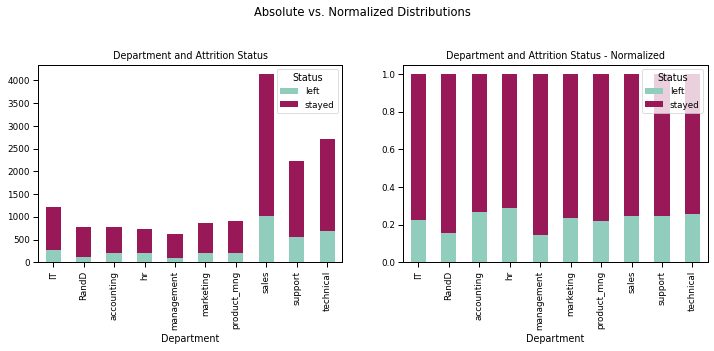

In [15]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
fig.suptitle('Absolute vs. Normalized Distributions')
crosstabdept = pd.crosstab(hr['Department'],hr['Status'])
crosstabdeptnorm = crosstabdept.div(crosstabdept.sum(1), axis = 0)
plotdest = crosstabdept.plot(kind='bar', stacked = True, 
                             title = 'Department and Attrition Status', 
                             ax = ax1, color = ['#90CDBC', '#991857'])
plotdeptnorm = crosstabdeptnorm.plot(kind='bar', stacked = True, 
                                     title = 'Department and'
                                     ' Attrition Status - Normalized', 
                                     ax = ax2, color = ['#90CDBC', 
                                                        '#991857'])

**The ensuing bar graphs measure attrition by salary. For example, there is a higher prevalance of lower salaries than medium and higher salaries, respectively. Amongst the lower salaries, more employees stayed within the company than those who left. Normalizing the distribution, we see the same trends; however, in terms of attrition rates, the lowest amongst the three categories is evident in the higher salaries. Lower salaries show the highest attrition rate, and medium salaries follow.**

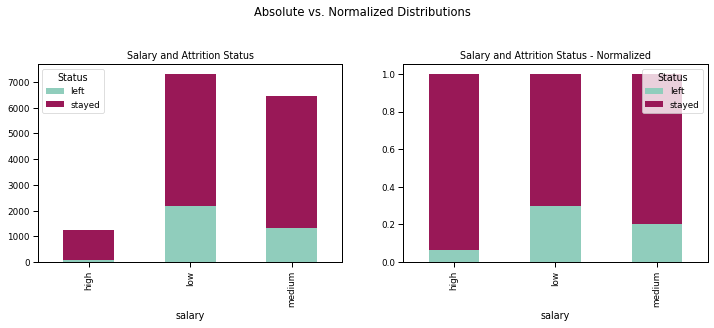

In [16]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
fig.suptitle('Absolute vs. Normalized Distributions')
crosstabsal = pd.crosstab(hr['salary'],hr['Status'])
crosstabsalnorm = crosstabsal.div(crosstabsal.sum(1), axis = 0)
plotdest = crosstabsal.plot(kind='bar', stacked = True, 
                            title = 'Salary and Attrition Status', 
                            ax = ax1, color = ['#90CDBC', '#991857'])
plotsalnorm = crosstabsalnorm.plot(kind='bar', stacked = True, 
                                   title = 'Salary and Attrition' 
                                   ' Status - Normalized', 
                                   ax = ax2, color = ['#90CDBC', 
                                                      '#991857'])

### Boxplot Distributions

Boxplot Distributions


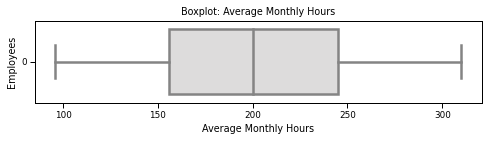

The first quartile is 156.0. 
The third quartile is 245.0. 
The IQR is 89.0.
The mean is 201.05.
The standard deviation is 49.94.
The median is 200.0.


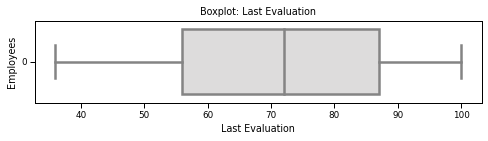

The first quartile is 56.0. 
The third quartile is 87.0. 
The IQR is 31.0.
The mean is 71.61.
The standard deviation is 17.12.
The median is 72.0.


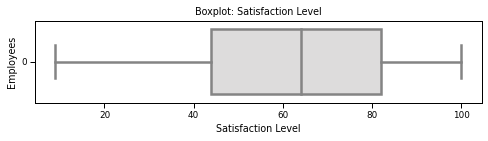

The first quartile is 44.0. 
The third quartile is 82.0. 
The IQR is 38.0.
The mean is 61.28.
The standard deviation is 24.86.
The median is 64.0.


In [17]:
# selected boxplot distributions
print("\033[1m"+'Boxplot Distributions'+"\033[1m")

# Boxplot of age as one way of showing distribution
fig = plt.figure(figsize = (8,1.5))
plt.title ('Boxplot: Average Monthly Hours')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Employees')
sns.boxplot(data=hr['average_monthly_hours'], 
            palette="coolwarm", orient='h', 
            linewidth=2.5)
plt.show()

# Computing IQR
Q1 = hr['average_monthly_hours'].quantile(0.25)
Q3 = hr['average_monthly_hours'].quantile(0.75)
IQR = Q3-Q1

# Computing Summary Stats of average_monthly_hours
mean_1 = round(hr['average_monthly_hours'].mean(),2)
std_1 = round(hr['average_monthly_hours'].std(),2)
median_1 = round(hr['average_monthly_hours'].median(),2)

print('The first quartile is %s. '%Q1)
print('The third quartile is %s. '%Q3)
print('The IQR is %s.'%round(IQR,2))
print('The mean is %s.'%mean_1)
print('The standard deviation is %s.'%std_1)
print('The median is %s.'%median_1)

fig = plt.figure(figsize = (8,1.5))
plt.title ('Boxplot: Last Evaluation')
plt.xlabel('Last Evaluation')
plt.ylabel('Employees')
sns.boxplot(data=hr['last_evaluation'], 
            palette="coolwarm", orient='h', 
            linewidth=2.5)
plt.show()

# Computing IQR of last_evaluation
Q1 = hr['last_evaluation'].quantile(0.25)
Q3 = hr['last_evaluation'].quantile(0.75)
IQR = Q3-Q1

# Computing Summary Stats of last_evaluation
mean_1 = round(hr['last_evaluation'].mean(),2)
std_1 = round(hr['last_evaluation'].std(),2)
median_1 = round(hr['last_evaluation'].median(),2)

print('The first quartile is %s. '%Q1)
print('The third quartile is %s. '%Q3)
print('The IQR is %s.'%round(IQR,2))
print('The mean is %s.'%mean_1)
print('The standard deviation is %s.'%std_1)
print('The median is %s.'%median_1)

fig = plt.figure(figsize = (8,1.5))
plt.title ('Boxplot: Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Employees')
sns.boxplot(data=hr['satisfaction_level'], 
            palette="coolwarm", orient='h', 
            linewidth=2.5)
plt.show()

# Computing IQR of satisfaction_level
Q1 = hr['satisfaction_level'].quantile(0.25)
Q3 = hr['satisfaction_level'].quantile(0.75)
IQR = Q3-Q1

# Computing Summary Stats of satisfaction_level
mean_1 = round(hr['satisfaction_level'].mean(),2)
std_1 = round(hr['satisfaction_level'].std(),2)
median_1 = round(hr['satisfaction_level'].median(),2)

print('The first quartile is %s. '%Q1)
print('The third quartile is %s. '%Q3)
print('The IQR is %s.'%round(IQR,2))
print('The mean is %s.'%mean_1)
print('The standard deviation is %s.'%std_1)
print('The median is %s.'%median_1)

***Note.*** **All of the examined boxplot distributions are normal. Furthermore, there were no outliers.**

### Histogram Distributions

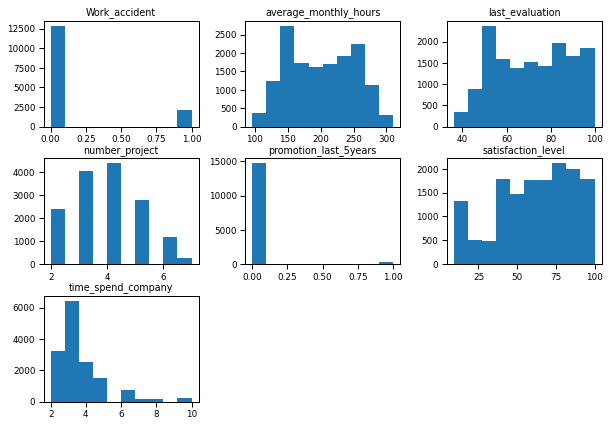

In [18]:
# checking for degenerate distributions
hr_hist = hr.drop(columns=['Attrition'])
hr_hist.hist(grid=False, figsize=(10,7)); plt.show()

***Note.*** **Most of our data were not normally distributed, with the exception to 'average_monthly_hours' and 'number_project.'**

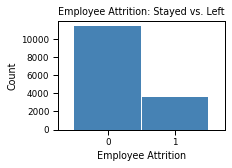

# of Employees that Stayed: 11428
# of Employees that Left: 3571
Attrition: 0.24


In [19]:
# employee attrition bar graph
attrition_count = hr['Attrition'].value_counts()
fig = plt.figure(figsize=(3,2))
attrition_count.plot.bar(x ='lab', y='val', rot=0, width=0.99, 
                         color="steelblue")

plt.title ('Employee Attrition: Stayed vs. Left')
plt.xlabel('Employee Attrition') 
plt.ylabel('Count')
plt.show()

attrition_yes = attrition_count[1]
attrition_no = attrition_count[0]
attrition_rate = attrition_yes/(attrition_no + attrition_yes)

print('# of Employees that Stayed:', attrition_no)
print('# of Employees that Left:', attrition_yes)
print('Attrition:', round(attrition_rate,2))

## Pre-Processing
&nbsp;
&nbsp;
&nbsp;
&nbsp;

In [20]:
# label encoding the department feature
le_department = LabelEncoder()
hr['department_label'] = le_department.fit_transform(hr['Department'])

In [21]:
# multiply by .01 to convert percentages to decimals
hr['satisfaction_level'] = .01*hr['satisfaction_level']
hr['last_evaluation'] = .01*hr['last_evaluation']

In [22]:
# map salary to three levels (low, medium, and high)
hr['salary_level'] = hr['salary'].map({'low':1,
                                       'medium':2, 
                                       'high':3})
# drop unnecessary columns
hr=hr.drop(columns=['Employee_ID','salary','Status', 'Department'])

### Checking for Statistical Significance Via Baseline Model

**The logistic regression model was introduced as a baseline because establishing impact of coefficients on each independent feature can be carried with relative ease. Moreover, it is possible to guage statistical significance from the reported *p*-values of the summary output table below.**

**Generalized Linear Model - Logistic Regression Baseline**

$$y = \beta_0 + \beta_1x_1 +\beta_2x_2 +\cdots+\beta_px_p + \varepsilon$$

**Logistic Regression - Parametric Form**

$$p(y) = \frac{\text{exp}(\beta_0+\beta_1x_1+\beta_2x_2+\cdot\cdot\cdot+\beta_px_p)}{1+\text{exp}(\beta_0+\beta_1x_1+\beta_2x_2+\cdot\cdot\cdot+\beta_px_p)}  + \varepsilon$$

**Logistic Regression - Descriptive Form**

$$\hat{p}(y) = \frac{\text{exp}(b_0+b_1x_1+b_2x_2+\cdot\cdot\cdot+b_px_p)}{1+\text{exp}(b_0+b_1x_1+b_2x_2+\cdot\cdot\cdot+b_px_p)}$$

In [23]:
X = hr.drop(columns=['Attrition'])
X = sm.add_constant(X)
y = pd.DataFrame(hr[['Attrition']])
log_results = sm.Logit(y,X, random_state=42).fit()
log_results.summary()

Optimization terminated successfully.
         Current function value: 0.431309
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                14999
Model:                          Logit   Df Residuals:                    14989
Method:                           MLE   Df Model:                            9
Date:                Mon, 18 Oct 2021   Pseudo R-squ.:                  0.2142
Time:                        16:24:24   Log-Likelihood:                -6469.2
converged:                       True   LL-Null:                       -8232.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.0201      0.138      7.407      0.000       0.750       1.290
satisfaction_level       -4.1307      0.098    -42.303      0.000      -4.322      -3.939
last_evaluation           0.7265      0.148      4.893      0.000       0.435       1.017
number_project           -0.3124      0.021    -14.755      0.000      -0.354      -0.271
average_monthly_hours     0.0044      0.001      8.663      0.000       0.003       0.005
time_spend_company        0.2576      0.015     16.877      0.000       0.228       0.287
Work_accident            -1.5384      0.089    -17.193      0.000      -1.714      -1.363
promotion_last_5years    -1.5032      0.256     -5.862      0.000      -2.006      -1.001
department_label          0.0303      0.008      3.904      0.000       0.015       0.046
salary_level             -0.6992      0.038    -18.471      0.000      -0.773      -0.625
=========================================================================================
"""

***Note.*** **All of the independent variables are statistically
 significant at the $\alpha$ = 0.05 level.**

## Train_Test_Validation Split

In [24]:
size_train = round(10499/14999,2)
size_valid = round(2250/14999,2)
size_test = round(300/2000,2)
print('training size:', size_train)
print('validation size:', size_valid)
print('test size:', size_test)

training size: 0.7
validation size: 0.15
test size: 0.15


In [25]:
train, test = train_test_split(hr, train_size = 10499, 
                               random_state = 42)
valid, test = train_test_split(test, train_size = 2250, 
                               random_state = 42)
# confirm dimensions (size of newly partioned data)
print('Training:',len(train))
print('Validation:', len(valid))
print('Test:', len(test))

Training: 10499
Validation: 2250
Test: 2250


In [26]:
# define (list) the features
X_var = list(hr.columns)
# define the target
target ='Attrition'
X_var.remove(target)
X_train = train[X_var]
y_train = train[target]
X_test = test[X_var] 
y_test = test[target]
X_valid = valid[X_var]
y_valid = valid[target]

## Model Building Strategies:
## Model Performance and Hyperparameter Tuning


&nbsp;
&nbsp;
&nbsp;
&nbsp;  

### Logistic Regression 

**The initial Logistic Regression model is semi-tuned, setting *C=1e42* to avoid regularization. The second model is subsequently tuned over a regularization norm of *'l2'*, a liblinear solver because it "converges rapidly" (Galarnyk, 2021), and a set of varying cost parameters. Model accuracy and *f1*-score is improved in the second. Details pertaining to these performance metrics are discussed in greater detail towards the end of all completed modeling.**

In [27]:
# Semi-tuned Logistic Regression
logit_reg = LogisticRegression(C=1e42, random_state=42) 
logit_reg.fit(X_train, y_train)

# Predict on validation set
logit_reg_pred1 = logit_reg.predict(X_valid)
# Predict on test set
logit_reg_pred2 = logit_reg.predict(X_test)

# accuracy and classification report
print('Untuned Logistic Regression Model')
print('Accuracy Score')
print(accuracy_score(y_valid, logit_reg_pred1))
print('Classification Report \n', 
       classification_report(y_valid, logit_reg_pred1))

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
LRtrainAcc = []
LRvalidAcc = []
LRtestAcc = []

# Tuned Logistic Regression Model
for param in C:
    tlr = LogisticRegression(penalty ='l2', 
                             solver = 'liblinear',
                             C=param, random_state=42)
    tlr.fit(X_train, y_train)

    tlr_pred_train = tlr.predict(X_train)
    # Predict on validation set
    tlr_pred_valid = tlr.predict(X_valid)
    # Predict on test set
    tlr_pred_test = tlr.predict(X_test)
    LRtrainAcc.append(accuracy_score(y_train, tlr_pred_train))
    LRvalidAcc.append(accuracy_score(y_valid, tlr_pred_valid))
    LRtestAcc.append(accuracy_score(y_test, tlr_pred_test))

# accuracy and classification report
print('Tuned Logistic Regression Model')
print('Accuracy Score')
print(accuracy_score(y_valid, tlr_pred_valid))
print('Classification Report \n', 
       classification_report(y_valid, tlr_pred_valid))

Untuned Logistic Regression Model
Accuracy Score
0.7795555555555556
Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      1716
           1       0.56      0.32      0.41       534

    accuracy                           0.78      2250
   macro avg       0.69      0.62      0.63      2250
weighted avg       0.75      0.78      0.76      2250

Tuned Logistic Regression Model
Accuracy Score
0.7835555555555556
Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1716
           1       0.58      0.34      0.42       534

    accuracy                           0.78      2250
   macro avg       0.70      0.63      0.65      2250
weighted avg       0.76      0.78      0.76      2250



### Decision Trees

**To determine the max_depth for the decision tree, a for-loop was created to find the ideal AUC score. However, AUC Score is not the only metric that can determine the ideal max depth. For this reason, accuracy score was also examined via for-loop. In using accuracy, it was determined that a max_depth of 13 was the optimal value.** 

**Whereas the initial Decision Tree Classifier below is un-tuned, this assumes a default *gini* criterion. Changing this hyperparameter to *entropy*, and varying the model over a range of 3 to 10, respectively, produces slightly better results, which will be discussed at the commencement of these algorithmic exercises.**  
&nbsp;
&nbsp;
&nbsp;
&nbsp;  

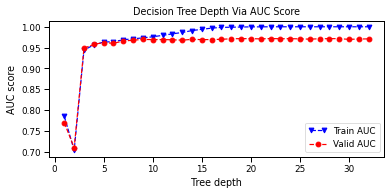

In [28]:
# to see if we need to alter max depth
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
valid_results = []

for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    valid_pred = dt.predict(X_valid)
    false_positive_rate, true_positive_rate, \
    thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_valid)
    false_positive_rate, true_positive_rate, \
    thresholds = roc_curve(y_valid, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    valid_results.append(roc_auc)

# plot tree depth by AUC score
fig, plt.subplots(figsize=(6,2.5))
line1, = plt.plot(max_depths, train_results, 
                  'bv--', label= "Train AUC")
line2, = plt.plot(max_depths, valid_results, 
                  'ro--', label="Valid AUC")

plt.title('Decision Tree Depth Via AUC Score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

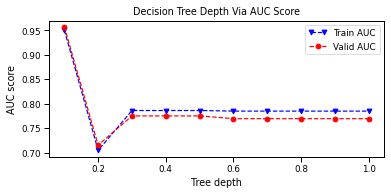

In [29]:
# to see if we should alter min_samples_split
# min_samples_split is the min. # of samples 
# required to split an internal node
# decided not to alter the min_samples_splits 
# from the preset parameters
# based on the output of the AUC graph

min_samples_splits=np.linspace(0.1, 1.0, 10,endpoint=True)
train_results=[]
valid_results=[]
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=\
                                min_samples_split)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate,\
    thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_valid)
    false_positive_rate, true_positive_rate,\
    thresholds = roc_curve(y_valid, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    valid_results.append(roc_auc)

# plot tree depth by AUC score
fig, plt.subplots(figsize=(6,2.5))
line1, = plt.plot(min_samples_splits, 
                  train_results, 'bv--',label="Train AUC")
line2, = plt.plot(min_samples_splits, 
                  valid_results, 'ro--',label="Valid AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.title('Decision Tree Depth Via AUC Score')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

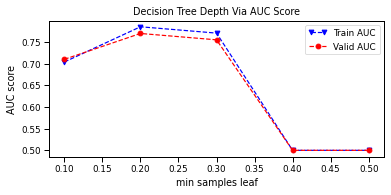

In [30]:
# min_samples_leaf: min # of samples to be a leaf
# decided not to alter the min_samples_leafs 
# from the preset parameters
# based on the output of the AUC graph

min_samples_leafs=np.linspace(0.1,0.5,5,endpoint=True)
train_results=[]
valid_results=[]
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=\
                                min_samples_leaf)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate,\
    thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_valid)
    false_positive_rate, true_positive_rate,\
    thresholds = roc_curve(y_valid, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    valid_results.append(roc_auc)
    
# plot tree depth by AUC score
fig, plt.subplots(figsize=(6,2.5))
line1, = plt.plot(min_samples_leafs, 
                  train_results, 'bv--', label= "Train AUC")
line2, = plt.plot(min_samples_leafs, 
                  valid_results, 'ro--', label="Valid AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.title('Decision Tree Depth Via AUC Score')
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

Depth =  3 	 Valid Accuracy = 0.96 	     Training Accuracy = 0.95
Depth =  4 	 Valid Accuracy = 0.97 	     Training Accuracy = 0.97
Depth =  5 	 Valid Accuracy = 0.97 	     Training Accuracy = 0.98
Depth =  6 	 Valid Accuracy = 0.98 	     Training Accuracy = 0.98
Depth =  7 	 Valid Accuracy = 0.98 	     Training Accuracy = 0.98
Depth =  8 	 Valid Accuracy = 0.98 	     Training Accuracy = 0.99
Depth =  9 	 Valid Accuracy = 0.98 	     Training Accuracy = 0.99
Depth = 10 	 Valid Accuracy = 0.98 	     Training Accuracy = 0.99
Depth = 11 	 Valid Accuracy = 0.98 	     Training Accuracy = 0.99
Depth = 12 	 Valid Accuracy = 0.98 	     Training Accuracy = 0.99
Depth = 13 	 Valid Accuracy = 0.97 	     Training Accuracy = 0.99
Depth = 14 	 Valid Accuracy = 0.98 	     Training Accuracy = 1.00


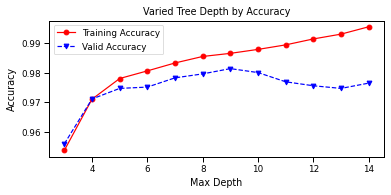

In [31]:
accuracy_depth=[]

# Vary the decision tree depth in a loop, 
# increasing depth from 3 to 14. 
for depth in range(3,15):
    varied_tree=DecisionTreeClassifier(max_depth=depth, 
                                       random_state=42)
    varied_tree=varied_tree.fit(X_train,y_train)
    tree_valid_pred = varied_tree.predict(X_valid)
    tree_train_pred = varied_tree.predict(X_train)
    accuracy_depth.append({'depth':depth,
                           'valid_accuracy':accuracy_score\
                           (y_valid,tree_valid_pred),
                           'train_accuracy':accuracy_score\
                           (y_train,tree_train_pred)
                          })
    print('Depth = %2.0f \t Valid Accuracy = %2.2f \t \
    Training Accuracy = %2.2f'% (depth,accuracy_score\
                                (y_valid, tree_valid_pred),
                                 accuracy_score(y_train, 
                                 tree_train_pred)))
abd_df = pd.DataFrame(accuracy_depth)
abd_df.index = abd_df['depth']

# plot tree depth by accuracy
fig, ax=plt.subplots(figsize=(6,2.5))
ax.plot(abd_df.depth,abd_df.train_accuracy,
        'ro-',label='Training Accuracy')
ax.plot(abd_df.depth,abd_df.valid_accuracy,
        'bv--',label='Valid Accuracy')
plt.title('Varied Tree Depth by Accuracy')
ax.set_xlabel('Max Depth')
ax.set_ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
# Untuned Decision Tree Classifier
untuned_hr_tree = DecisionTreeClassifier(random_state=42)
untuned_hr_tree = untuned_hr_tree.fit(X_train, y_train)

# Predict on validation set
untuned_hr_tree1 = untuned_hr_tree.predict(X_valid)
# Predict on test set
untuned_hr_tree2 = untuned_hr_tree.predict(X_test)

# accuracy and classification report
print('Untuned Decision Tree Classifier')
print('Accuracy Score')
print(accuracy_score(y_valid, untuned_hr_tree1))
print('Classification Report \n', 
      classification_report(y_valid, untuned_hr_tree1))

# Tuned Decision Tree Classifier
accuracy_depth = []
for depth in range(3,11):
    hr_tree=DecisionTreeClassifier(criterion='entropy',
                                   max_depth=13,
                                   random_state=42,
                                   class_weight='balanced')
    hr_tree=hr_tree.fit(X_train, y_train)
    # Predict on validation set
    hr_tree_valid=hr_tree.predict(X_valid)
    # Predict on test set
    hr_tree_test=hr_tree.predict(X_test)

# accuracy and classification report
print('Tuned Decision Tree Classifier')
print('Accuracy Score')
print(accuracy_score(y_valid, hr_tree_valid))
print('Classification Report \n', 
      classification_report(y_valid, hr_tree_valid))

Untuned Decision Tree Classifier
Accuracy Score
0.9711111111111111
Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1716
           1       0.92      0.97      0.94       534

    accuracy                           0.97      2250
   macro avg       0.95      0.97      0.96      2250
weighted avg       0.97      0.97      0.97      2250

Tuned Decision Tree Classifier
Accuracy Score
0.9693333333333334
Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1716
           1       0.92      0.95      0.94       534

    accuracy                           0.97      2250
   macro avg       0.95      0.96      0.96      2250
weighted avg       0.97      0.97      0.97      2250



**The Decision Tree Classifier is pruned in order to understand splits:**

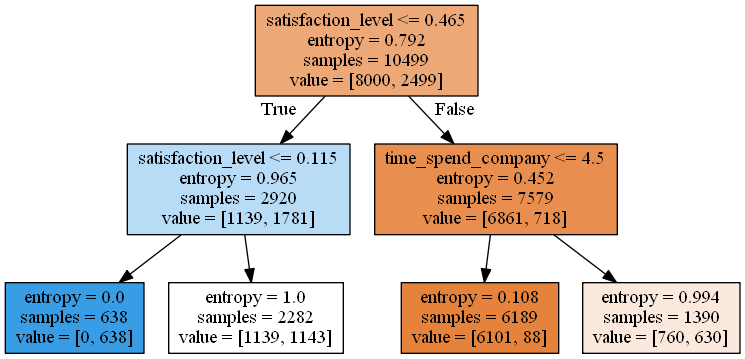

In [33]:
# Plot the decision tree with a max depth of 2
hr_tree2 = DecisionTreeClassifier(criterion='entropy',
                                  max_depth=2,
                                  random_state=42)

hr_tree2 = hr_tree2.fit(X_train,y_train)
# Predict on validation set
hr_tree2_pred2 = hr_tree2.predict(X_valid)
# Predict on test set
hr_tree2_pred2 = hr_tree2.predict(X_test)

# plot pruned tree at a max depth of 2
dot_data = export_graphviz(hr_tree2,
feature_names = X_var,
filled = True, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

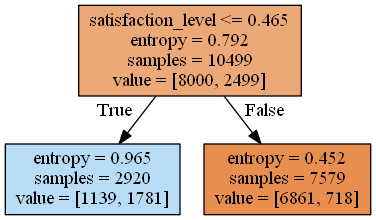

In [34]:
# Plot the decision tree with a max depth of 1
hr_tree2 = DecisionTreeClassifier(criterion='entropy',
                                  max_depth=1,
                                  random_state=42)
hr_tree2 = hr_tree2.fit(X_train,y_train)
hr_tree2_pred2 = hr_tree2.predict(X_valid)

dot_data = export_graphviz(hr_tree2,
                           feature_names = X_var,
                           filled = True, 
                           out_file=None)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Support Vector Machines - Linear Kernel

**The idea or premise behind this method was to find the optimal linearly separable hyperplane for which support vectors would make classifications on both sides. The introductory model was semi-tuned to factor in this separation, via a linear kernel.**

Constrained optimization takes the following form, to estimate ($w^*$, and $b^*$):

\begin{eqnarray*}
&&\min_{w^*,b^*,\{\xi_i\}} \frac{\|w\|^2}{2} + \frac{1}{C} \sum_i \xi_i \\
\textrm{s.t.} && \forall i: y_i\bigg[w^T \phi(x_i) + b\bigg] \ge 1 - \xi_i, \ \ \xi_i \ge 0  
\end{eqnarray*}

In [35]:
# Semi-tuned Support Vector Machine
hr_svm = SVC(kernel = "linear", random_state=42, 
probability=True)
hr_svm.fit(X_train, y_train)
hr_svm_pred_valid = hr_svm.predict(X_valid)
hr_svm_pred_test = hr_svm.predict(X_test)

# accuracy and classification report
print('Semi-tuned Support Vector Machine')
print('Accuracy Score')
print(accuracy_score(y_valid, hr_svm_pred_valid))
print('Classification Report \n', 
       classification_report(y_valid, hr_svm_pred_valid))

Semi-tuned Support Vector Machine
Accuracy Score
0.7706666666666667
Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.93      0.86      1716
           1       0.54      0.24      0.34       534

    accuracy                           0.77      2250
   macro avg       0.67      0.59      0.60      2250
weighted avg       0.74      0.77      0.74      2250



### Support Vector Machines - Radial Basis Function Kernel

**The radial basis function kernel was also explored via additional hyperparameter tuning, to accomodate non-linearly separable possibilities. Furthermore, the cost hyperparameter was varied in a for-loop in order to add "a penalty for each misclassified data point. If c is small, the penalty for misclassified points is low so a decision boundary with a large margin is chosen at the expense of a greater number of misclassifications" (Yıldırım, 2020).**

\begin{eqnarray*}
K(x,x^{'}) = \text{exp} \left(-\frac{||x-x^{'}||^2}{2\sigma^2} \right) 
\end{eqnarray*}

\begin{eqnarray*}
K(x,x^{'}) = \text{exp} (-\gamma ||x-x^{'}||^2)
\end{eqnarray*}

Cost = 0.01 	 Valid Accuracy = 0.76 	     Training Accuracy = 0.76
Cost = 0.10 	 Valid Accuracy = 0.91 	     Training Accuracy = 0.92
Cost = 0.20 	 Valid Accuracy = 0.93 	     Training Accuracy = 0.94
Cost = 0.50 	 Valid Accuracy = 0.95 	     Training Accuracy = 0.96
Cost = 0.80 	 Valid Accuracy = 0.95 	     Training Accuracy = 0.96
Cost = 1.00 	 Valid Accuracy = 0.95 	     Training Accuracy = 0.96
Cost = 5.00 	 Valid Accuracy = 0.96 	     Training Accuracy = 0.98
Cost = 10.00 	 Valid Accuracy = 0.96 	     Training Accuracy = 0.99
Cost = 20.00 	 Valid Accuracy = 0.96 	     Training Accuracy = 0.99
Cost = 50.00 	 Valid Accuracy = 0.96 	     Training Accuracy = 1.00


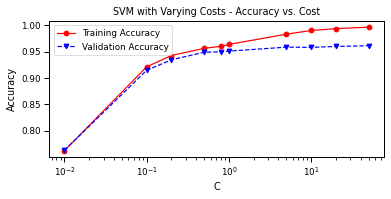

Tuned Support Vector Machine
Accuracy Score
0.9613333333333334
Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      1716
           1       0.90      0.94      0.92       534

    accuracy                           0.96      2250
   macro avg       0.94      0.95      0.95      2250
weighted avg       0.96      0.96      0.96      2250



In [36]:
# Tuned Support Vector Machine
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

hr_svm1_trainAcc = []
hr_svm1_validAcc = []
hr_svm1_testAcc = []

for param in C:
    hr_svm1 = SVC(C=param, kernel='rbf', 
                  gamma = 'auto', random_state=42,
                  probability=True)
    hr_svm1.fit(X_train, y_train)
    hr_svm1_pred_train = hr_svm1.predict(X_train)
    hr_svm1_pred_valid = hr_svm1.predict(X_valid)
    hr_svm1_pred_test = hr_svm1.predict(X_test)  
    hr_svm1_trainAcc.append(accuracy_score(y_train, hr_svm1_pred_train))
    hr_svm1_validAcc.append(accuracy_score(y_valid, hr_svm1_pred_valid))
    print('Cost = %2.2f \t Valid Accuracy = %2.2f \t \
    Training Accuracy = %2.2f'% (param, accuracy_score(y_valid,
                                 hr_svm1_pred_valid),
                                 accuracy_score(y_train ,
                                 hr_svm1_pred_train)))    
# plot cost by accuracy
fig, ax = plt.subplots(figsize=(6,2.5))
ax.plot(C, hr_svm1_trainAcc, 'ro-', C, hr_svm1_validAcc,'bv--')
ax.legend(['Training Accuracy','Validation Accuracy'])
plt.title('SVM with Varying Costs - Accuracy vs. Cost')
ax.set_xlabel('C')
ax.set_xscale('log')
ax.set_ylabel('Accuracy')
plt.show()

# accuracy and classification report
print('Tuned Support Vector Machine')
print('Accuracy Score')
print(accuracy_score(y_valid, hr_svm1_pred_valid))
print('Classification Report \n', 
       classification_report(y_valid, hr_svm1_pred_valid))

### Random Forests

**We decided to run the Random forest model to test performance. The Random forest performed really well without tuning. We dismissed this model due to having a high recall.**

Untuned Random Forest Model
Accuracy Score
0.9893333333333333
Classification Report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1716
           1       0.99      0.96      0.98       534

    accuracy                           0.99      2250
   macro avg       0.99      0.98      0.99      2250
weighted avg       0.99      0.99      0.99      2250

Max Depth =  1 	 Valid Accuracy = 0.76 	     Training Accuracy = 0.76
Max Depth =  2 	 Valid Accuracy = 0.91 	     Training Accuracy = 0.91
Max Depth =  3 	 Valid Accuracy = 0.91 	     Training Accuracy = 0.92
Max Depth =  4 	 Valid Accuracy = 0.95 	     Training Accuracy = 0.96
Max Depth =  5 	 Valid Accuracy = 0.97 	     Training Accuracy = 0.98
Max Depth =  6 	 Valid Accuracy = 0.98 	     Training Accuracy = 0.98
Max Depth =  7 	 Valid Accuracy = 0.98 	     Training Accuracy = 0.98
Max Depth =  8 	 Valid Accuracy = 0.98 	     Training Accuracy = 0.98
Max Depth =  9 	 Valid Accu

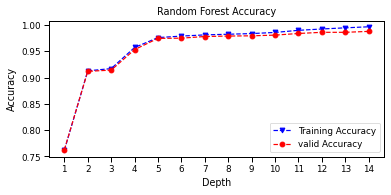

Tuned Random Forest Model
Accuracy Score
0.9871111111111112
Classification Report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1716
           1       0.99      0.96      0.97       534

    accuracy                           0.99      2250
   macro avg       0.99      0.98      0.98      2250
weighted avg       0.99      0.99      0.99      2250



In [37]:
# Untuned Random Forest
hr_rf = RandomForestClassifier(random_state=42)
hr_rf = hr_rf.fit(X_train, y_train)

# Predict on validation set
hr_rf1 = hr_rf.predict(X_valid)
# Predict on test set
hr_rf2 = hr_rf.predict(X_test)

# accuracy and classification report
print('Untuned Random Forest Model')
print('Accuracy Score')
print(accuracy_score(y_valid, hr_rf1))
print('Classification Report \n', 
       classification_report(y_valid, hr_rf1))

# Random Forest Tuning
rf_train_accuracy = []
rf_valid_accuracy = []
for n in range(1, 15):
    rf = RandomForestClassifier(max_depth = n, 
                                random_state=42)
    rf = rf.fit(X_train,y_train)
    rf_pred_train = rf.predict(X_train)
    rf_pred_valid = rf.predict(X_valid)
    rf_train_accuracy.append(accuracy_score(y_train, 
                                            rf_pred_train))
    rf_valid_accuracy.append(accuracy_score(y_valid, 
                                            rf_pred_valid))
    print('Max Depth = %2.0f \t Valid Accuracy = %2.2f \t \
    Training Accuracy = %2.2f'% (n,accuracy_score(y_valid,
                                                  rf_pred_valid),
                               accuracy_score(y_train,
                                              rf_pred_train)))
max_depth = list(range(1, 15))
fig, plt.subplots(figsize=(6,2.5))
plt.plot(max_depth, rf_train_accuracy, 'bv--', 
         label='Training Accuracy')
plt.plot(max_depth, rf_valid_accuracy, 'ro--', 
         label='valid Accuracy')
plt.title('Random Forest Accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.xticks(max_depth)
plt.legend()
plt.show()

# Tuned Random Forest
hr_rf1_train_accuracy = []
hr_rf1_valid_accuracy = []
hr_rf1_test_accuracy = []
for n in range(1, 15):
    hr_rf1 = RandomForestClassifier(max_depth = 13,
                                    # max_features ='auto',
                                    n_estimators=50,
                                    random_state=42,  
                                    class_weight="balanced")
    hr_rf1 = hr_rf1.fit(X_train, y_train)
    hr_rf1_pred_train = hr_rf1.predict(X_train)
    hr_rf1_pred_valid = hr_rf1.predict(X_valid)
    hr_rf1_pred_test = hr_rf1.predict(X_test)

# accuracy and classification report
print('Tuned Random Forest Model')
print('Accuracy Score')
print(accuracy_score(y_valid, hr_rf1_pred_valid))
print('Classification Report \n', 
       classification_report(y_valid, hr_rf1_pred_valid))

### Bagging

**Bagging was introduced as a hyperparamater optimization method (no un-tuned method was previously included). To this end, we introduced the KNeighborsClassifier() to "boost" accuracy rates.**

In [38]:
hr_bag = BaggingClassifier(base_estimator=\
                           KNeighborsClassifier(),
                           random_state=42)
hr_bag = hr_bag.fit(X_train, y_train)

# Predict on validation set
hr_bag_valid = hr_bag.predict(X_valid)
# Predict on test set
hr_bag_test = hr_bag.predict(X_test)

# accuracy and classification report
print('Bagging Model')
print('Accuracy Score')
print(accuracy_score(y_valid, hr_bag_valid))
print('Classification Report \n', 
       classification_report(y_valid, hr_bag_valid))

Bagging Model
Accuracy Score
0.9342222222222222
Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      1716
           1       0.82      0.92      0.87       534

    accuracy                           0.93      2250
   macro avg       0.90      0.93      0.91      2250
weighted avg       0.94      0.93      0.94      2250



### Linear Discriminant Analysis 

**Linear Discriminant Analysis uses the singular value decomposition (*svd*) solver by default. In this particular case, changing the solver hyperparameter to reflect eigenvalue decomposition (*eigen*) bears no significance to the performance metrics outcome. Neither does adjusting the shrinkage to *auto*, or storing the covriance matrix within the model. The results are still the same.**

In [39]:
# Untuned Linear Discriminant Analysis
hr_lda = LinearDiscriminantAnalysis()
hr_lda = hr_lda.fit(X_train, y_train)

# Predict on validation set
hr_lda_valid = hr_lda.predict(X_valid)
# Predict on test set
hr_lda_test = hr_lda.predict(X_test)

# accuracy and classification report
print('Untuned LDA Model')
print('Accuracy Score')
print(accuracy_score(y_valid, hr_lda_valid))
print('Classification Report \n', 
      classification_report(y_valid, hr_lda_valid))


# Tuned Linear Discriminant Analysis
hr_lda_tuned = LinearDiscriminantAnalysis(solver='eigen',
                                          shrinkage='auto',
                                          store_covariance = True)
hr_lda_tuned = hr_lda_tuned.fit(X_train, y_train)

# Predict on validation set
hr_lda_tuned_valid = hr_lda.predict(X_valid)
# Predict on test set
hr_lda_tuned_test = hr_lda.predict(X_test)

# accuracy and classification report
print('Tuned LDA Model')
print('Accuracy Score')
print(accuracy_score(y_valid, hr_lda_tuned_valid))
print('Classification Report \n', 
      classification_report(y_valid, hr_lda_tuned_valid))


Untuned LDA Model
Accuracy Score
0.7711111111111111
Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.91      0.86      1716
           1       0.53      0.31      0.39       534

    accuracy                           0.77      2250
   macro avg       0.67      0.61      0.62      2250
weighted avg       0.74      0.77      0.75      2250

Tuned LDA Model
Accuracy Score
0.7711111111111111
Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.91      0.86      1716
           1       0.53      0.31      0.39       534

    accuracy                           0.77      2250
   macro avg       0.67      0.61      0.62      2250
weighted avg       0.74      0.77      0.75      2250



### Neural Network

**Both an un-tuned and a tuned model were attempted; the performance of the un-tuned model superceded that of the tuned.**  
***Note.*** **The tuned model was unable to classify any instance of attrition in our validation set.**

In [40]:
# Untuned Neural Network
hr_neural = MLPClassifier(random_state=42)
hr_neural.fit(X_train, y_train)

# Predict on validation set
hr_neural_pred = hr_neural.predict(X_valid)

# accuracy and classification report
print('Untuned Neural Network')
print('Accuracy Score')
print(accuracy_score(y_valid, hr_neural_pred))
print('Classification Report \n', 
      classification_report(y_valid, hr_neural_pred))

# Tuned Neural Network
hr_neural1 = MLPClassifier(hidden_layer_sizes = (3), 
activation = 'logistic', solver = 'lbfgs', 
random_state=42, max_iter = 5000)

hr_neural1.fit(X_train,y_train)

# Predict on validation set
hr_neural_pred_valid = hr_neural1.predict(X_valid)
# Predict on test set
hr_neural_pred_test = hr_neural1.predict(X_test)

# accuracy and classification report
print('Tuned Neural Network')
print('Accuracy Score')
print(accuracy_score(y_valid, hr_neural_pred_valid))
print('Classification Report \n', 
       classification_report(y_valid, hr_neural_pred_valid))

Untuned Neural Network
Accuracy Score
0.884
Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.86      0.92      1716
           1       0.68      0.95      0.80       534

    accuracy                           0.88      2250
   macro avg       0.83      0.91      0.86      2250
weighted avg       0.91      0.88      0.89      2250

Tuned Neural Network
Accuracy Score
0.7626666666666667
Classification Report 
               precision    recall  f1-score   support

           0       0.76      1.00      0.87      1716
           1       0.00      0.00      0.00       534

    accuracy                           0.76      2250
   macro avg       0.38      0.50      0.43      2250
weighted avg       0.58      0.76      0.66      2250



### *K*-Nearest Neighbors

**To determine the optimal *K*, "the square root of N, where N is the total number of samples" (Band, 2020) was taken.** 


In [41]:
results = []

for k in range (70, 80):
    knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train.values)
    results.append({
        'k': k,
        'accuracy': accuracy_score(y_valid, knn.predict(X_valid))
    })

results = pd.DataFrame(results)
print(results)

    k  accuracy
0  70      0.89
1  71      0.89
2  72      0.89
3  73      0.89
4  74      0.89
5  75      0.90
6  76      0.89
7  77      0.89
8  78      0.89
9  79      0.89


# of Neighbors = 71 	 Validation Accuracy = 0.89 	         Training Accuracy = 0.90
# of Neighbors = 73 	 Validation Accuracy = 0.89 	         Training Accuracy = 0.90
# of Neighbors = 75 	 Validation Accuracy = 0.90 	         Training Accuracy = 0.90
# of Neighbors = 77 	 Validation Accuracy = 0.89 	         Training Accuracy = 0.89
# of Neighbors = 79 	 Validation Accuracy = 0.89 	         Training Accuracy = 0.89


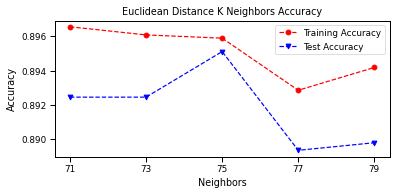

In [42]:
# euclidean distance
knn_train_accuracy = []
knn_valid_accuracy = []
knn_test_accuracy = []
for n in range(70, 80):
    if(n%2!=0):
        knn = KNeighborsClassifier(n_neighbors=n,p=2)
        knn = knn.fit(X_train,y_train)
        knn_pred_train = knn.predict(X_train)
        knn_pred_valid = knn.predict(X_valid)
        knn_pred_test = knn.predict(X_test)
        knn_train_accuracy.append\
        (accuracy_score(y_train, knn_pred_train))
        knn_valid_accuracy.append\
        (accuracy_score(y_valid, knn_pred_valid))
        knn_test_accuracy.append\
        (accuracy_score(y_test, knn_pred_test))
        print('# of Neighbors = %d \t Validation'
        ' Accuracy = %2.2f \t \
        Training Accuracy = %2.2f'% (n, accuracy_score\
        (y_valid,knn_pred_valid), accuracy_score\
        (y_train,knn_pred_train)))
    
max_depth = list([71, 73, 75, 77, 79])
# plot accuracy by # of neighbors
fig, plt.subplots(figsize=(6,2.5))
plt.plot(max_depth, knn_train_accuracy, 
         'ro--', label='Training Accuracy')
plt.plot(max_depth, knn_valid_accuracy, 
         'bv--', label='Test Accuracy')
plt.title('Euclidean Distance K Neighbors Accuracy')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.xticks(max_depth)
plt.legend()
plt.show()

# of Neighbors = 71 	 Validation Accuracy = 0.92 	         Training Accuracy = 0.92
# of Neighbors = 73 	 Validation Accuracy = 0.92 	         Training Accuracy = 0.92
# of Neighbors = 75 	 Validation Accuracy = 0.92 	         Training Accuracy = 0.92
# of Neighbors = 77 	 Validation Accuracy = 0.92 	         Training Accuracy = 0.92
# of Neighbors = 79 	 Validation Accuracy = 0.92 	         Training Accuracy = 0.92


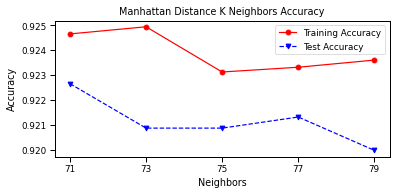

In [43]:
# Manhattan Distance
knn_train_accuracy = []
knn_valid_accuracy = []
knn_test_accuracy = []
for n in range(70, 80) :
    if(n%2!=0):
        knn = KNeighborsClassifier(n_neighbors=n,
                                   metric='manhattan',
                                   p=1)
        knn = knn.fit(X_train,y_train)
        knn_pred_train = knn.predict(X_train)
        knn_pred_valid = knn.predict(X_valid)
        knn_pred_test = knn.predict(X_test)
        knn_train_accuracy.append(accuracy_score\
        (y_train, knn_pred_train))
        knn_valid_accuracy.append(accuracy_score\
        (y_valid, knn_pred_valid))
        knn_test_accuracy.append(accuracy_score\
        (y_test, knn_pred_test))
        print('# of Neighbors = %d \t Validation'
        ' Accuracy = %2.2f \t \
        Training Accuracy = %2.2f'%(n,accuracy_score\
             (y_valid,knn_pred_valid),accuracy_score\
             (y_train,knn_pred_train)))
    
max_depth = list([71, 73, 75, 77, 79])
# plot accuracy by # of neighbors
fig, plt.subplots(figsize=(6,2.5))
plt.plot(max_depth, knn_train_accuracy, 
         'ro-', label='Training Accuracy')
plt.plot(max_depth, knn_valid_accuracy, 
         'bv--', label='Test Accuracy')
plt.title('Manhattan Distance K Neighbors Accuracy')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.xticks(max_depth)
plt.legend()
plt.show()

In [44]:
hr_knn = KNeighborsClassifier(n_neighbors = 77, 
metric = 'manhattan', p = 1)
hr_knn = knn.fit(X_train,y_train)

# Predict on validation set
hr_knn_pred_valid = hr_knn.predict(X_valid)
# Predict on test set
hr_knn_pred_train = hr_knn.predict(X_test)
# accuracy and classification report
print('Tuned KNN Model (Manhattan Distance)')
print('Accuracy Score')
print(accuracy_score(y_valid, hr_knn_pred_valid))
print('Classification Report \n', 
      classification_report(y_valid, 
                            hr_knn_pred_valid))

Tuned KNN Model (Manhattan Distance)
Accuracy Score
0.92
Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1716
           1       0.83      0.84      0.83       534

    accuracy                           0.92      2250
   macro avg       0.89      0.89      0.89      2250
weighted avg       0.92      0.92      0.92      2250



## Model Evaluation  
&nbsp;
&nbsp;
&nbsp;
&nbsp;  

Confusion Matrices


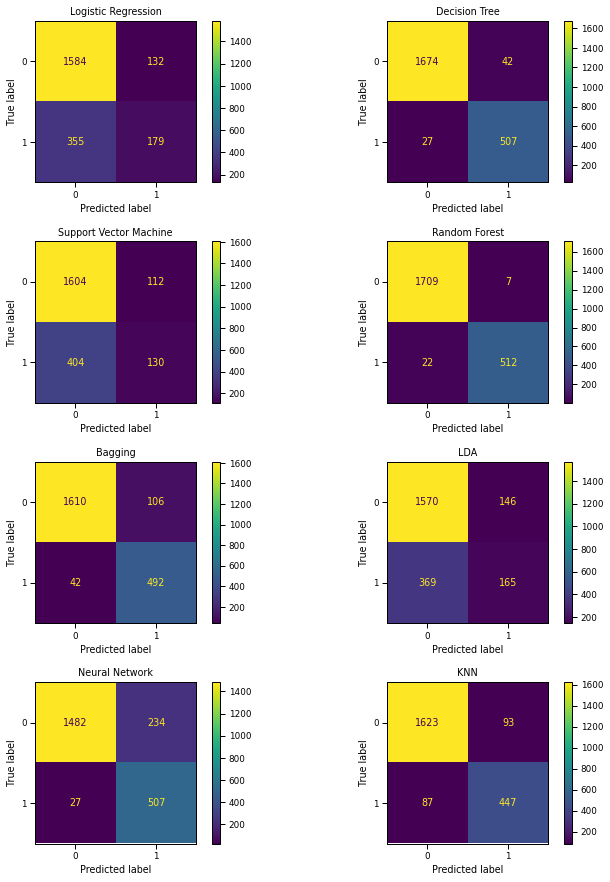

In [45]:
# print confusion matrices
print("\033[1m"+'Confusion Matrices'+"\033[1m")

fig, axes = plt.subplots(nrows=4, 
                         ncols=2, 
                         figsize=(10,12))
flat = axes.flatten()
fig.tight_layout(w_pad=0.5, 
                 h_pad=4)

# logistic regression confusion matrix
plot_confusion_matrix(tlr,X_valid,y_valid,ax=flat[0])
flat[0].set_title('Logistic Regression')

# decision tree confusion matrix
plot_confusion_matrix(hr_tree,X_valid,y_valid,ax=flat[1])
flat[1].set_title('Decision Tree')

# support vector machine confusion matrix
plot_confusion_matrix(hr_svm,X_valid,y_valid,ax=flat[2])
flat[2].set_title('Support Vector Machine')

# random forest confusion matrix
plot_confusion_matrix(hr_rf1,X_valid,y_valid,ax=flat[3])
flat[3].set_title('Random Forest')

# bagging confusion matrix
plot_confusion_matrix(hr_bag,X_valid,y_valid,ax=flat[4])
flat[4].set_title('Bagging')

# linear discriminant analysis confusion matrix
plot_confusion_matrix(hr_lda,X_valid,y_valid,ax=flat[5])
flat[5].set_title('LDA')

# neural network confusion matrix
plot_confusion_matrix(hr_neural,X_valid,y_valid,ax=flat[6])
flat[6].set_title('Neural Network')

# k-nearest neighbors confusion matrix
plot_confusion_matrix(hr_knn,X_valid,y_valid,ax=flat[7])
flat[7].set_title('KNN')
plt.show()

### Individual Cumulative Gains Charts   

Cumulative Gains Charts


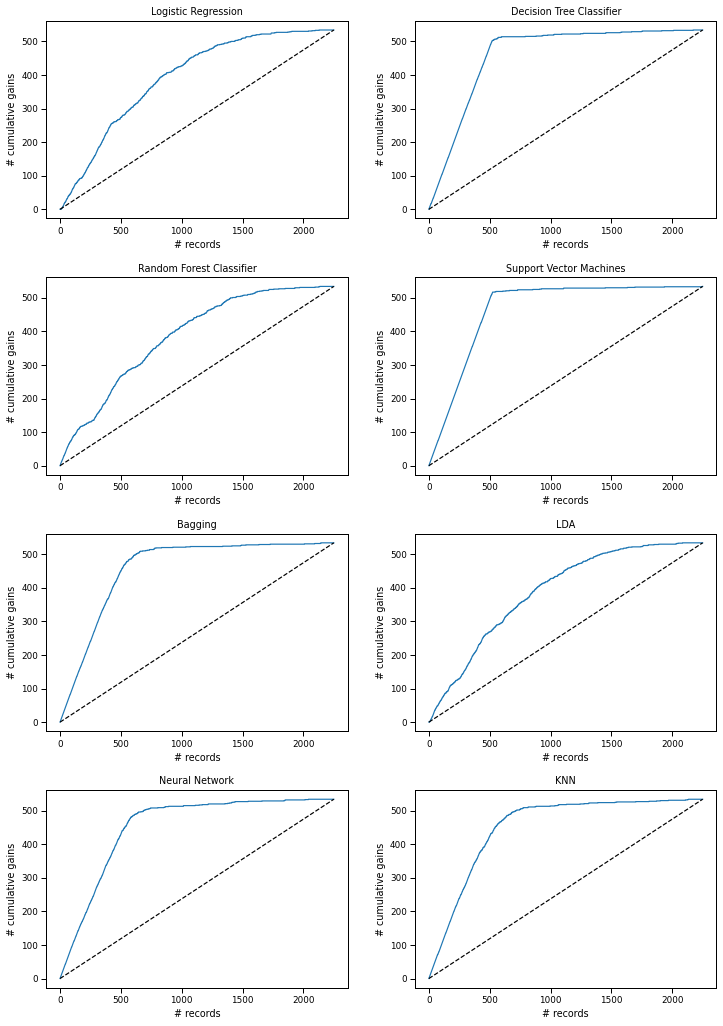

In [46]:
# individual cumulative gains charts
print("\033[1m"+'Cumulative Gains Charts'+"\033[1m")
fig, axes = plt.subplots(nrows=4, 
                         ncols=2, 
                         figsize=(10,14))
flat = axes.flatten()
fig.tight_layout(w_pad=4, 
                 h_pad=4)

# logistic regression gains chart
res_1 = pd.DataFrame({
    'actual': y_valid,
    'prob': tlr.predict_proba(X_valid[X_var])[:, 1]
})

res_1 = res_1.sort_values(by=['prob'], 
                          ascending=False).\
                          reset_index(drop=True)
gainsChart(res_1.actual, ax=flat[0])
flat[0].set_title('Logistic Regression')

# decision tree gains chart
res_2 = pd.DataFrame({
    'actual': y_valid,
    'prob': hr_tree.predict_proba(X_valid[X_var])[:, 1]
})

res_2 = res_2.sort_values(by=['prob'],ascending=False).\
                          reset_index(drop=True)
gainsChart(res_2.actual, ax=flat[1])
flat[1].set_title('Decision Tree Classifier')

# support vector machine gains chart
res_3 = pd.DataFrame({
    'actual': y_valid,
    'prob': hr_svm.predict_proba(X_valid[X_var])[:, 1]
})

res_3 = res_3.sort_values(by=['prob'],ascending=False).\
                          reset_index(drop=True)
gainsChart(res_3.actual, ax=flat[2])
flat[2].set_title('Random Forest Classifier')

# random forest gains chart
res_4 = pd.DataFrame({
    'actual': y_valid,
    'prob': hr_rf1.predict_proba(X_valid[X_var])[:, 1]
})

res_4 = res_4.sort_values(by=['prob'],ascending=False).\
                          reset_index(drop=True)
gainsChart(res_4.actual, ax=flat[3])
flat[3].set_title('Support Vector Machines') 

# bagging gains chart
res_5 = pd.DataFrame({
    'actual': y_valid,
    'prob': hr_bag.predict_proba(X_valid[X_var])[:, 1]
})

res_5 = res_5.sort_values(by=['prob'],ascending=False).\
                          reset_index(drop=True)
gainsChart(res_5.actual, ax=flat[4])
flat[4].set_title('Bagging') 

# linear discriminant analysis gains chart
res_6 = pd.DataFrame({
    'actual': y_valid,
    'prob': hr_lda.predict_proba(X_valid[X_var])[:, 1]
})

res_6 = res_6.sort_values(by=['prob'],ascending=False).\
                          reset_index(drop=True)
gainsChart(res_6.actual, ax=flat[5])
flat[5].set_title('LDA') 

# neural network gains chart
res_7 = pd.DataFrame({
    'actual': y_valid,
    'prob': hr_neural.predict_proba(X_valid[X_var])[:, 1]
})

res_7 = res_7.sort_values(by=['prob'],ascending=False).\
                          reset_index(drop=True)
gainsChart(res_7.actual, ax=flat[6])
flat[6].set_title('Neural Network') 

# k-nearest neighbors gains chart
res_8 = pd.DataFrame({
    'actual': y_valid,
    'prob': hr_knn.predict_proba(X_valid[X_var])[:, 1]
})

res_8 = res_8.sort_values(by=['prob'],ascending=False).\
                          reset_index(drop=True)
gainsChart(res_8.actual, ax=flat[7])
flat[7].set_title('KNN')
plt.show()

### Cumulative Gains Charts   

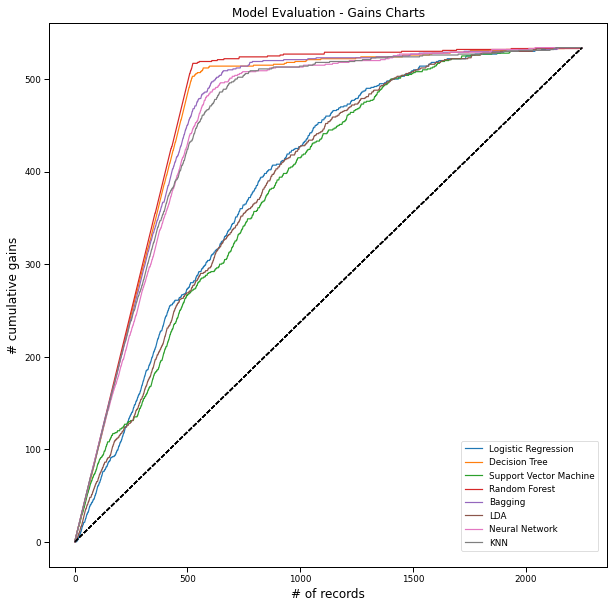

In [47]:
# cumulative gains charts

# logistic regression gains chart
res_1 = pd.DataFrame({
    'actual': y_valid,
    'prob': tlr.predict_proba(X_valid[X_var])[:, 1]
})
res_1 = res_1.sort_values(by=['prob'],ascending=False).\
                          reset_index(drop=True)

# decision tree gains chart 
res_2 = pd.DataFrame({
    'actual': y_valid,
    'prob': hr_tree.predict_proba(X_valid[X_var])[:, 1]
})

res_2 = res_2.sort_values(by=['prob'],ascending=False).\
                          reset_index(drop=True)

# support vector machine gains chart
res_3 = pd.DataFrame({
    'actual': y_valid,
    'prob': hr_svm.predict_proba(X_valid[X_var])[:, 1]
})

res_3 = res_3.sort_values(by=['prob'],ascending=False).\
                          reset_index(drop=True)

# random forest gains chart
res_4 = pd.DataFrame({
    'actual': y_valid,
    'prob': hr_rf1.predict_proba(X_valid[X_var])[:, 1]
})
res_4 = res_4.sort_values(by=['prob'],ascending=False).\
                          reset_index(drop=True)

# bagging gains chart
res_5 = pd.DataFrame({
    'actual': y_valid,
    'prob': hr_bag.predict_proba(X_valid[X_var])[:, 1]
})
res_5 = res_5.sort_values(by=['prob'],ascending=False).\
                          reset_index(drop=True)

# linear discriminant analysis gains chart
res_6 = pd.DataFrame({
    'actual': y_valid,
    'prob': hr_lda.predict_proba(X_valid[X_var])[:, 1]
})
res_6 = res_6.sort_values(by=['prob'],ascending=False).\
                          reset_index(drop=True)

# neural network gains chart
res_7 = pd.DataFrame({
    'actual': y_valid,
    'prob': hr_neural.predict_proba(X_valid[X_var])[:, 1]
})
res_7 = res_7.sort_values(by=['prob'],ascending=False).\
                          reset_index(drop=True)

# k-nearest neighbors gains chart
res_8 = pd.DataFrame({
    'actual': y_valid,
    'prob': hr_knn.predict_proba(X_valid[X_var])[:, 1]
})
res_8 = res_8.sort_values(by=['prob'],ascending=False).\
                          reset_index(drop=True)

ax=gainsChart(res_1.actual, label='Logistic Regression', 
              color='C0', figsize=[10,10])
ax=gainsChart(res_2.actual, label='Decision Tree', 
              color='C1', ax=ax)
ax=gainsChart(res_3.actual, label='Support Vector Machine', 
              color='C2', ax=ax)
ax=gainsChart(res_4.actual, label='Random Forest', 
              color='C3', ax=ax)
ax=gainsChart(res_5.actual, label='Bagging', 
              color='C4', ax=ax)
ax=gainsChart(res_6.actual, label='LDA', 
              color='C5', ax=ax)
ax=gainsChart(res_7.actual, label='Neural Network', 
              color='C6', ax=ax)
ax=gainsChart(res_8.actual, label='KNN',
              color='C7', ax=ax)

# plot cumulative gains on one graph
plt.title('Model Evaluation - Gains Charts', 
           fontsize=12)
plt.xlabel('# of records', 
           fontsize=12) 
plt.ylabel('# cumulative gains', 
           fontsize=12) 
ax.legend(loc='center left', 
          bbox_to_anchor=(0.73, 0.13))
plt.show()

### ROC Curves

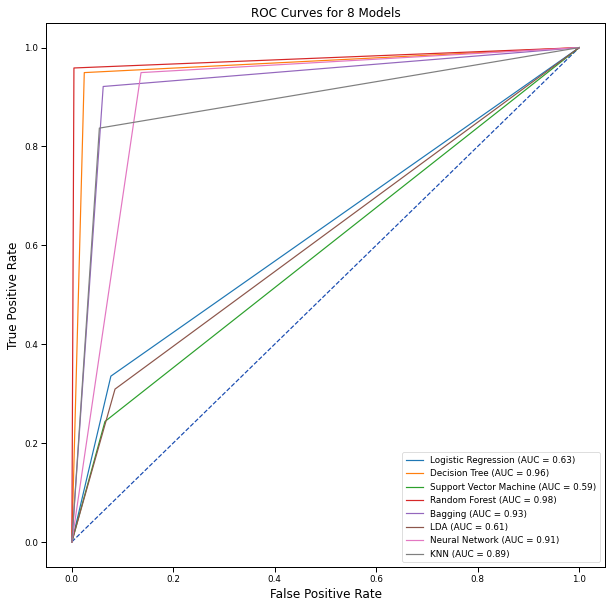

In [48]:
# plot all of the roc curves on one graph

tlr_roc = metrics.roc_curve(y_valid,tlr_pred_valid)
fpr,tpr,thresholds = metrics.roc_curve(y_valid,tlr_pred_valid)
tlr_auc = metrics.auc(fpr, tpr)
tlr_plot = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr, 
roc_auc=tlr_auc, 
estimator_name='Logistic Regression')

hr_tree_roc = metrics.roc_curve(y_valid,hr_tree_valid)
fpr,tpr,thresholds = metrics.roc_curve(y_valid,hr_tree_valid)
hr_tree_auc = metrics.auc(fpr, tpr)
hr_tree_plot = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,
roc_auc=hr_tree_auc, 
estimator_name='Decision Tree')

hr_svm_roc = metrics.roc_curve(y_valid, hr_svm_pred_valid)
fpr,tpr,thresholds = metrics.roc_curve(y_valid,hr_svm_pred_valid)
hr_svm_auc = metrics.auc(fpr, tpr)
hr_svm_plot = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr, 
roc_auc=hr_svm_auc, 
estimator_name='Support Vector Machine')

hr_rf1_roc = metrics.roc_curve(y_valid, hr_rf1_pred_valid)
fpr,tpr,thresholds = metrics.roc_curve(y_valid,hr_rf1_pred_valid)
hr_rf1_auc = metrics.auc(fpr, tpr)
hr_rf1_plot = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr, 
roc_auc=hr_rf1_auc, 
estimator_name='Random Forest')

hr_bag_valid_roc = metrics.roc_curve(y_valid, hr_bag_valid)
fpr,tpr,thresholds = metrics.roc_curve(y_valid,hr_bag_valid)
hr_bag_valid_auc = metrics.auc(fpr, tpr)
hr_bag_valid_plot = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr, 
roc_auc = hr_bag_valid_auc, 
estimator_name='Bagging')

hr_lda_tuned_roc = metrics.roc_curve(y_valid,hr_lda_tuned_valid)
fpr,tpr,thresholds = metrics.roc_curve(y_valid,hr_lda_tuned_valid)
hr_lda_tuned_auc = metrics.auc(fpr, tpr)
hr_lda_tuned_plot = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr, 
roc_auc=hr_lda_tuned_auc, 
estimator_name='LDA')

hr_neural_roc = metrics.roc_curve(y_valid,hr_neural_pred)
fpr,tpr,thresholds = metrics.roc_curve(y_valid,hr_neural_pred)
hr_neural_auc = metrics.auc(fpr, tpr)
hr_neural_plot = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr, 
roc_auc=hr_neural_auc, 
estimator_name='Neural Network')

hr_knn_roc = metrics.roc_curve(y_valid,hr_knn_pred_valid)
fpr, tpr, thresholds = metrics.roc_curve(y_valid,hr_knn_pred_valid)
hr_knn_auc = metrics.auc(fpr, tpr)
hr_knn_plot = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr, 
roc_auc=hr_knn_auc, 
estimator_name='KNN')

# plot set up
fig, ax = plt.subplots(figsize=(10,10))
plt.title('ROC Curves for 8 Models',fontsize=12)
plt.plot([0, 1], [0, 1], linestyle = '--', 
         color = '#174ab0')
plt.xlabel('',fontsize=12) 
plt.ylabel('',fontsize=12) 

# Model ROC Plots Defined above
tlr_plot.plot(ax)
hr_tree_plot.plot(ax)
hr_svm_plot.plot(ax)
hr_rf1_plot.plot(ax)
hr_bag_valid_plot.plot(ax)
hr_lda_tuned_plot.plot(ax)
hr_neural_plot.plot(ax)
hr_knn_plot.plot(ax)
plt.show()

### Defining Model Performance Metrics for the validation set

In [49]:
# Logistic Regression Performance Metrics
report1 = classification_report(y_valid,tlr_pred_valid,
output_dict=True)
accuracy1 = round(report1['accuracy'],2)
precision1 = round(report1['1']['precision'],2)
recall1 = round(report1['1']['recall'],2)
fl_score1 = round(report1['1']['f1-score'],2)

# Decision Tree Performance Metrics                       
report2 = classification_report(y_valid,hr_tree_valid,
output_dict=True)
accuracy2 = round(report2['accuracy'],2)
precision2 = round(report2['1']['precision'],2)
recall2 = round(report2['1']['recall'],2)
fl_score2 = round(report2['1']['f1-score'],2)

# # Support Vector Machine
report3 = classification_report(y_valid,hr_svm_pred_valid,
output_dict=True)                
accuracy3 = round(report3['accuracy'],2)
precision3 = round(report3['1']['precision'],2)
recall3 = round(report3['1']['recall'],2)
fl_score3 = round(report3['1']['f1-score'],2)

# Random Forest Performance Metrics
report4 = classification_report(y_valid,hr_rf1_pred_valid,
output_dict=True)                
accuracy4 = round(report4['accuracy'],2)
precision4 = round(report4['1']['precision'],2)
recall4 = round(report4['1']['recall'],2)
fl_score4 = round(report4['1']['f1-score'],2)             

# Bagging Performance Metrics
report5 = classification_report(y_valid,hr_bag_valid,
output_dict=True)           
accuracy5 = round(report5['accuracy'],2)
precision5 = round(report5['1']['precision'],2)
recall5 = round(report5['1']['recall'],2)
fl_score5 = round(report5['1']['f1-score'],2)

# LDA Performance Metrics
report6 = classification_report(y_valid,hr_lda_tuned_valid,
output_dict=True)           
accuracy6 = round(report6['accuracy'],2)
precision6 = round(report6['1']['precision'],2)
recall6 = round(report6['1']['recall'],2)
fl_score6 = round(report6['1']['f1-score'],2)

# Neural Network Performance Metrics
report7 = classification_report(y_valid,hr_neural_pred,
output_dict=True)           
accuracy7 = round(report7['accuracy'],2)
precision7 = round(report7['1']['precision'],2)
recall7 = round(report7['1']['recall'],2)
fl_score7 = round(report7['1']['f1-score'],2)

# Neural Network Performance Metrics
report8 = classification_report(y_valid,hr_knn_pred_valid,
output_dict=True)           
accuracy8 = round(report8['accuracy'],2)
precision8 = round(report8['1']['precision'],2)
recall8 = round(report8['1']['recall'],2)
fl_score8 = round(report8['1']['f1-score'],2)            

In [50]:
table1 = PrettyTable()
table1.field_names = ['Model', 'Validation Accur.', 
                      'Precision', 'Recall', 
                      'F1-score']
table1.add_row(['Logistic Regression', accuracy1, 
                precision1, recall1, fl_score1])
table1.add_row(['Decision Tree', accuracy2, 
                precision2, recall2, fl_score2])
table1.add_row(['Support Vector Machine', accuracy3, 
                precision3, recall3, fl_score3])
table1.add_row(['Random Forest', accuracy4, 
                precision4, recall4, fl_score4])
table1.add_row(['Bagging', accuracy5, precision5, 
                recall5, fl_score5])
table1.add_row(['LDA', accuracy6, precision6, 
                recall6, fl_score6])
table1.add_row(['Neural Network', accuracy7, 
                precision7, recall7, fl_score7])
table1.add_row(['K-Nearest Neighbor', accuracy8, 
                precision8, recall8, fl_score8])
print(table1)

+------------------------+-------------------+-----------+--------+----------+
|         Model          | Validation Accur. | Precision | Recall | F1-score |
+------------------------+-------------------+-----------+--------+----------+
|  Logistic Regression   |        0.78       |    0.58   |  0.34  |   0.42   |
|     Decision Tree      |        0.97       |    0.92   |  0.95  |   0.94   |
| Support Vector Machine |        0.77       |    0.54   |  0.24  |   0.34   |
|     Random Forest      |        0.99       |    0.99   |  0.96  |   0.97   |
|        Bagging         |        0.93       |    0.82   |  0.92  |   0.87   |
|          LDA           |        0.77       |    0.53   |  0.31  |   0.39   |
|     Neural Network     |        0.88       |    0.68   |  0.95  |   0.8    |
|   K-Nearest Neighbor   |        0.92       |    0.83   |  0.84  |   0.83   |
+------------------------+-------------------+-----------+--------+----------+


In [51]:
# Mean-Squared Errors 
rmse0 = round(mean_squared_error(y_valid, 
                                 tlr_pred_valid),2)
rmse1 = round(mean_squared_error(y_valid, 
                                 hr_tree_valid),2)
rmse2 = round(mean_squared_error(y_valid, 
                                 hr_svm_pred_valid),2)
rmse3 = round(mean_squared_error(y_valid, 
                                 hr_rf1_pred_valid),2)
rmse4 = round(mean_squared_error(y_valid, 
                                 hr_bag_valid),2)
rmse5 = round(mean_squared_error(y_valid, 
                                 hr_lda_tuned_valid),2)
rmse6 = round(mean_squared_error(y_valid, 
                                 hr_neural_pred_valid),2)
rmse7 = round(mean_squared_error(y_valid, 
                                 hr_knn_pred_valid),2)
table2 = PrettyTable()
table2.field_names = ['Model', 'AUC', 'RMSE']
table2.add_row(['Logistic Regression', 
                 round(tlr_auc,2), rmse0])
table2.add_row(['Decision Tree', 
                 round(hr_tree_auc,2), rmse1])
table2.add_row(['Support Vector Machine', 
                 round(hr_svm_auc,2), rmse2])
table2.add_row(['Random Forest', 
                 round(hr_rf1_auc,2), rmse3])
table2.add_row(['Bagging', 
                 round(hr_bag_valid_auc,2), rmse4])
table2.add_row(['LDA', 
                 round(hr_lda_tuned_auc,2), rmse5])
table2.add_row(['Neural Network', 
                 round(hr_neural_auc,2), rmse6])
table2.add_row(['K-Nearest Neighbor', 
                 round(hr_knn_auc,2), rmse7])
print(table2)

+------------------------+------+------+
|         Model          | AUC  | RMSE |
+------------------------+------+------+
|  Logistic Regression   | 0.63 | 0.22 |
|     Decision Tree      | 0.96 | 0.03 |
| Support Vector Machine | 0.59 | 0.23 |
|     Random Forest      | 0.98 | 0.01 |
|        Bagging         | 0.93 | 0.07 |
|          LDA           | 0.61 | 0.23 |
|     Neural Network     | 0.91 | 0.24 |
|   K-Nearest Neighbor   | 0.89 | 0.08 |
+------------------------+------+------+


### Projecting Results Onto Unseen (Test) Data

In [52]:
new_df = X_test.copy()

In [53]:
new_df['Probabilities'] = hr_tree.predict_proba(new_df[X_var])[:, 1]
new_df['Predictions'] = hr_tree.predict(new_df[X_var])
new_df.sort_values(by='Probabilities', ascending=False)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,department_label,salary_level,Probabilities,Predictions
8083,0.58,0.53,3,287,5,0,0,0,1,1.00,1
1533,0.44,0.53,2,146,3,0,0,5,1,1.00,1
12033,0.45,0.55,2,140,3,0,0,3,1,1.00,1
14829,0.45,0.57,2,148,3,0,0,5,3,1.00,1
68,0.76,0.86,5,223,5,1,0,6,2,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...
11274,0.48,0.84,4,186,7,0,1,4,2,0.00,0
7685,0.96,0.88,5,269,2,0,0,8,2,0.00,0
2334,0.79,0.50,5,176,3,0,0,8,3,0.00,0
3017,0.98,0.78,4,155,3,1,0,9,1,0.00,0


In [54]:
# predictions on unseen data
future_retention = new_df[new_df['Predictions']==0].shape[0]
future_attrition = new_df[new_df['Predictions']==1].shape[0]

print('Future Retention:', future_retention)
print('Future Attrition:', future_attrition)
print('Attrition Percentage:', 
      round(future_attrition/new_df.shape[0],3))

Future Retention: 1703
Future Attrition: 547
Attrition Percentage: 0.243


## Results and Final Model Selection

* **For the Decision Tree, there was a high validation accuracy (97%), a high precision (92%), and a high recall (95%). The *f*-1 score (94%) was also among the highest.**
* **Furthermore, the AUC(96%) was among the highest, and the RMSE(3%) was the second lowest.** 
* **From this balanced vantage point, the Decision Tree model was selected as the predominant model.**
* **The model determined that 24.3% people are likely to leave the company (547 employees were earmarked for attrition).**

## Conclusion

* **The Decision Tree Classifier could be further improved due to possible confounding variables.** 

* **Data should be provided for us to perform future forecasts. As more employee data becomes available, future forecasts should be continuously performed in order to improve model performance and predictive ability.**

* **This model could be utilized across other departments and branches of this company in the future.**


### References

Band, A. (2020, May 23). How to find the optimal value of K in KNN?   
&nbsp;&nbsp;&nbsp;&nbsp; *Towards Data Science.* https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb

Galarnyk, M. (2021, February 3). How to Speed up Scikit-Learn Model Training. *Anyscale.*  
&nbsp;&nbsp;&nbsp;&nbsp; https://www.anyscale.com/blog/how-to-speed-up-scikit-learn-model-training

Yıldırım, S. (2020, May 31). Hyperparameter Tuning for Support Vector Machines - C and Gamma Parameters.  
&nbsp;&nbsp;&nbsp;&nbsp; *Towards Data Science.* https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167